# CS579: Lecture 15  

**More Classification**

*[Dr. Aron Culotta](http://cs.iit.edu/~culotta)*  
*[Illinois Institute of Technology](http://iit.edu)*

## Recall Error function for logistic regression.

Given labeled dataset $D=\{(x_1, y_1), \ldots (x_n, y_n)\}$

$$
E(D, \theta) = - \prod_{i \in D} p(y_i|x_i)
$$

$$
p(y_i|x_i) = \frac{1}{1 + e^{-y_i x_i \cdot \theta}}
$$

In [132]:
import numpy as np
import math

In [134]:
x = np.array([1,0,0,1])
theta = np.array([.9, -.9, .1, -.1])
x.dot(theta)
# E.g., 
# feature 0 (.9) is strongly predictive of y=1
# feature 1 (-.9) is strongly predictive of y=-1
# feature 2 (.1) is weakly predictive of y=1
# feature 3 (-.1) is weakly predictive of y=1

0.80000000000000004

In [136]:
def logistic(x, theta, y):
    return 1. / (1 + math.exp(-y * x.dot(theta)))

print('for x=', x)
print('p(y=1|x)=%.3g' % logistic(x, theta, 1.))
print('p(y=-1|x)=%.3g' % logistic(x, theta, -1.))

('for x=', array([1, 0, 0, 1]))
p(y=1|x)=0.69
p(y=-1|x)=0.31


In [138]:
x = np.array([1, 0, 1, 0])
print('for x=', x)
print('p(y=1|x)=%.3g' % logistic(x, theta, 1.))
print('p(y=0|x)=%.3g' % logistic(x, theta, -1.))

('for x=', array([1, 0, 1, 0]))
p(y=1|x)=0.731
p(y=0|x)=0.269


In [139]:
x = np.array([0, 1, 1, 0])
print('for x=', x)
print('p(y=1|x)=%.3g' % logistic(x, theta, 1.))
print('p(y=0|x)=%.3g' % logistic(x, theta, -1.))

('for x=', array([0, 1, 1, 0]))
p(y=1|x)=0.31
p(y=0|x)=0.69


In [140]:
def error(X, y, theta):
    error = 1.
    for xi, yi in zip(X, y):
        prob = logistic(xi, theta, yi)
        print('probability of %d for %s=%.3f' % (yi, str(xi), prob))
        error *= prob
    return -error

In [141]:
X = np.array([
  [1, 0, 0, 0],
  [1, 0, 1, 0],
  [0, 1, 0, 0],
  [0, 1, 0, 1],
])

y = np.array([
        1,
        1,
        -1,
        -1
    ])

In [142]:
print('error for theta=', theta)
error(X, y, theta)

('error for theta=', array([ 0.9, -0.9,  0.1, -0.1]))
probability of 1 for [1 0 0 0]=0.711
probability of 1 for [1 0 1 0]=0.731
probability of -1 for [0 1 0 0]=0.711
probability of -1 for [0 1 0 1]=0.731


-0.2701356268331891

In [143]:
# Make theta even better:
theta = np.array([10, -10, 10, -10])
error(X, y, theta)

probability of 1 for [1 0 0 0]=1.000
probability of 1 for [1 0 1 0]=1.000
probability of -1 for [0 1 0 0]=1.000
probability of -1 for [0 1 0 1]=1.000


-0.9999092022016287

In [144]:
# Make theta much, much worse:
theta = np.array([-10, 10, -10, 10])
error(X, y, theta)

probability of 1 for [1 0 0 0]=0.000
probability of 1 for [1 0 1 0]=0.000
probability of -1 for [0 1 0 0]=0.000
probability of -1 for [0 1 0 1]=0.000


-8.755715690797854e-27

In [49]:
# Make theta even better:
theta = np.array([100, -100, 100, -100])
error(X, y, theta)

probability of 1 for [1 0 0 0]=1.000
probability of 1 for [1 0 1 0]=1.000
probability of -1 for [0 1 0 0]=1.000
probability of -1 for [0 1 0 1]=1.000


-1.0

## Regularization

Controls how many parameters the model has, or how large each parameter can get.

E.g. L2 Regularization for linear regression:

$$
E(D, \theta) =  - \prod_{i \in D} p(y_i|x_i) + \frac{1}{C}||\vec{\theta}||^2_2
$$

$$
 =  - \prod_{i \in D} p(y_i|x_i) + \frac{1}{C}\sum_k \theta_k^2
$$

As $C \rightarrow 0$, the classifier prefers smaller and smaller coefficients.

This is the $C$ parameter of the `LogisticRegression` class in sklearn.



In [145]:
from collections import Counter
import glob
import hashlib
import io
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import re
from sklearn.cross_validation import KFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import tarfile
from urllib import urlretrieve
%matplotlib inline

In [146]:
def get_data():
    """ Download and unzip data."""
    urlretrieve('https://www.dropbox.com/s/xk4glpk61q3qrg2/imdb.tgz?dl=1', 'imdb.tgz')
    tar = tarfile.open("imdb.tgz")
    tar.extractall()
    tar.close()
    
get_data()

In [147]:
# Here is the path to the data directory.
path = 'data'
print('subdirectories are:' + str(os.listdir(path)))

subdirectories are:['test', 'train']


In [148]:
def get_files(path):
    """ Return a list of file names in this directory that end in .txt 
    The list should be sorted alphabetically by file name.
    Params:
        path....a directory containing .txt review files.
    Returns:
        a list of .txt file names, sorted alphabetically.
    """
    ###TODO
    return sorted([f for f in glob.glob(path + os.sep + '*.txt')])
    ###

In [149]:
pos_train_files = get_files(path + os.sep + 'train' + os.sep + 'pos')
neg_train_files = get_files(path + os.sep + 'train' + os.sep + 'neg')
all_train_files = pos_train_files + neg_train_files

print('found %d positive and %d negative training files' %
      (len(pos_train_files), len(neg_train_files)))
print('first positive file: %s' % pos_train_files[0])
print('first negative file: %s' % neg_train_files[0])

found 200 positive and 200 negative training files
first positive file: data/train/pos/10057_9.txt
first negative file: data/train/neg/10108_1.txt


In [150]:
def get_true_labels(file_names):
    """Return a *numpy array* of ints for the true sentiment labels of each file.
    1 means positive, 0 means negative. Use the name of the file to determine
    the true label.
    Params:
        file_names....a list of .txt file paths, e.g., data/train/pos/10057_9.txt
    Returns:
        a numpy array of 1 or 0 values corresponding to each element
        of file_names, where 1 indicates a positive review, and 0
        indicates a negative review.
    """
    ###TODO
    return np.array([1 if 'pos' in f else 0 for f in file_names])
    ###

labels = get_true_labels(all_train_files)
print('first 3 and last 3 labels are: %s' % str(labels[[1,2,3,-3,-2,-1]]))

first 3 and last 3 labels are: [1 1 1 0 0 0]


In [151]:
# Here's what a positive review looks like.
def file2string(filename):
    return io.open(filename, encoding='utf8').readlines()[0]
    
file2string(pos_train_files[10])

u"This is a great film!! The first time I saw it I thought it was absorbing from start to finish and I still do now. I may not have seen the play, but even if I had it wouldn't stop me thinking that the film is just as good."

In [152]:
def tokenize(text):
    """Given a string, return a list of tokens such that: (1) all
    tokens are lowercase, (2) all punctuation is removed. Note that
    underscore (_) is not considered punctuation.
    Params:
        text....a string
    Returns:
        a list of tokens
    """
    ###TODO
    return re.findall('\w+', text.lower())
    ###

tokenize("Hi! How's it going??? an_underscore is not *really* punctuation.")

['hi',
 'how',
 's',
 'it',
 'going',
 'an_underscore',
 'is',
 'not',
 'really',
 'punctuation']

In [153]:
def do_vectorize(filenames, tokenizer_fn=tokenize, min_df=1,
                 max_df=1., binary=True, ngram_range=(1,1)):
    """
    Convert a list of filenames into a sparse csr_matrix, where
    each row is a file and each column represents a unique word.
    Use sklearn's CountVectorizer: http://goo.gl/eJ2PJ5
    Params:
        filenames.......list of review file names
        tokenizer_fn....the function used to tokenize each document
        min_df..........remove terms from the vocabulary that don't appear
                        in at least this many documents
        max_df..........remove terms from the vocabulary that appear in more
                        than this fraction of documents
        binary..........If true, each documents is represented by a binary
                        vector, where 1 means a term occurs at least once in 
                        the document. If false, the term frequency is used instead.
        ngram_range.....A tuple (n,m) means to use phrases of length n to m inclusive.
                        E.g., (1,2) means consider unigrams and bigrams.
    Return:
        A tuple (X, vec), where X is the csr_matrix of feature vectors,
        and vec is the CountVectorizer object.
    """
    ###TODO
    vec = CountVectorizer(input='filename', tokenizer=tokenizer_fn,
                          binary=binary, min_df=min_df, max_df=max_df,
                          ngram_range=ngram_range)
    X = vec.fit_transform(filenames)
    return (X, vec)
    ###
    
matrix, vec = do_vectorize(all_train_files)
print ('matrix represents %d documents with %d features' % (matrix.shape[0], matrix.shape[1]))
print('first doc has terms:\n%s' % (str(sorted(matrix[0].nonzero()[1]))))

matrix represents 400 documents with 10710 features
first doc has terms:
[128, 170, 202, 253, 260, 312, 355, 439, 504, 514, 560, 673, 683, 702, 750, 860, 869, 961, 985, 1013, 1222, 1254, 1312, 1341, 1403, 1444, 1451, 1469, 1504, 1658, 1665, 1743, 2465, 2537, 2996, 3109, 3206, 3229, 3356, 3368, 3515, 3634, 3706, 3716, 3759, 3810, 3926, 4015, 4059, 4061, 4087, 4139, 4205, 4207, 4222, 4309, 4366, 4384, 4412, 4435, 4472, 4510, 4524, 4631, 4690, 4757, 4798, 5062, 5074, 5225, 5274, 5287, 5289, 5312, 5360, 5418, 5609, 5610, 5646, 5693, 5761, 5888, 5932, 5948, 6116, 6243, 6258, 6294, 6424, 6440, 6579, 6620, 6676, 6696, 6860, 6942, 7094, 7626, 8052, 8248, 8336, 8341, 8474, 8767, 8988, 9204, 9412, 9436, 9440, 9505, 9508, 9523, 9550, 9558, 9634, 9684, 9690, 9835, 9855, 9857, 10047, 10337, 10353, 10431, 10441, 10446, 10448, 10519]


In [154]:
# Do not modify. This is to randomize the order of the documents, but
# in a way that is consistent across platforms.
# See: http://stackoverflow.com/a/18992474/1756896
# You should run this block once to get the shuffled data.
def repeatable_random(seed):
    hash = str(seed)
    while True:
        hash = hashlib.md5(hash).digest()
        for c in hash:
            yield ord(c)

def repeatable_shuffle(X, y, filenames):
    r = repeatable_random(42) 
    indices = sorted(range(X.shape[0]), key=lambda x: next(r))
    return X[indices], y[indices], np.array(filenames)[indices]

X, y, filenames = repeatable_shuffle(matrix, labels, all_train_files)

print('first shuffled document %s has label %d and terms: %s' % 
      (filenames[0], y[0], sorted(X[0].nonzero()[1])))

first shuffled document data/train/pos/5140_10.txt has label 1 and terms: [98, 170, 355, 384, 514, 720, 750, 780, 1225, 2234, 3356, 3682, 3916, 4015, 4397, 4690, 4798, 5074, 5080, 5764, 5948, 6579, 6782, 6950, 7899, 8186, 8587, 9045, 9508, 9550, 9609, 9827, 10003, 10421, 10640]


In [155]:
# Do not modify. This creates a LogsticRegression object, which
# you will use in the do_cross_validation method below.
def get_clf(c=1, penalty='l2'):
    return LogisticRegression(random_state=42, C=c, penalty=penalty)

In [156]:
def do_cross_validation(X, y, n_folds=5, c=1, penalty='l2', verbose=False):
    """
    Perform n-fold cross validation, calling get_clf() to train n
    different classifiers. Use sklearn's KFold class: http://goo.gl/wmyFhi
    Be sure not to shuffle the data, otherwise your output will differ.
    Params:
        X.........a csr_matrix of feature vectors
        y.........the true labels of each document
        n_folds...the number of folds of cross-validation to do
        verbose...If true, report the testing accuracy for each fold.
    Return:
        the average testing accuracy across all folds.
    """
    ###TODO
    cv = KFold(len(y), n_folds=n_folds, shuffle=False)
    accuracies = []
    train_accuracies = []
    for foldi, (train, test) in enumerate(cv):
        clf = get_clf(c=c, penalty=penalty)
        clf.fit(X[train], y[train])
        train_accuracies.append(accuracy_score(clf.predict(X[train]), y[train]))
        pred = clf.predict(X[test])
        acc = accuracy_score(pred, y[test])
        accuracies.append(acc)
        if verbose:
            print('fold %d accuracy=%.4g' % (foldi, acc))
    return np.mean(accuracies), np.mean(train_accuracies)
    ###
    
print('average cross validation test accuracy=%.4f train accuracy=%.4f' %
      do_cross_validation(X, y, verbose=True))

fold 0 accuracy=0.7125
fold 1 accuracy=0.775
fold 2 accuracy=0.775
fold 3 accuracy=0.725
fold 4 accuracy=0.7125
average cross validation test accuracy=0.7400 train accuracy=1.0000


In [157]:
def do_expt(filenames, y, tokenizer_fn=tokenize,
            min_df=1, max_df=1., binary=True,
            ngram_range=(1,1), n_folds=5, c=1, penalty='l2'):
    """
    Run one experiment, which consists of vectorizing each file,
    performing cross-validation, and returning the average accuracy.
    You should call do_vectorize and do_cross_validation here.
    Params:
        filenames.......list of review file names
        y...............the true sentiment labels for each file
        tokenizer_fn....the function used to tokenize each document
        min_df..........remove terms from the vocabulary that don't appear
                        in at least this many documents
        max_df..........remove terms from the vocabulary that appear in more
                        than this fraction of documents
        binary..........If true, each documents is represented by a binary
                        vector, where 1 means a term occurs at least once in 
                        the document. If false, the term frequency is used instead.
        ngram_range.....A tuple (n,m) means to use phrases of length n to m inclusive.
                        E.g., (1,2) means consider unigrams and bigrams.
        n_folds.........The number of cross-validation folds to use.
    Returns:
        the average cross validation testing accuracy.
    """
    ###TODO
    X, vec = do_vectorize(filenames, tokenizer_fn=tokenizer_fn,
                          binary=binary, min_df=min_df,
                          max_df=max_df, ngram_range=ngram_range)
    return do_cross_validation(X, y, verbose=False, n_folds=n_folds, c=c, penalty=penalty)
    ###

In [158]:
print('accuracy using default settings: test acc=%.4g train acc=%.4g' % do_expt(filenames, y))

accuracy using default settings: test acc=0.74 train acc=1


## Compare accuracy of various settings

Next, we'll try out a few different settings to see how they affect cross-validation accuracy.

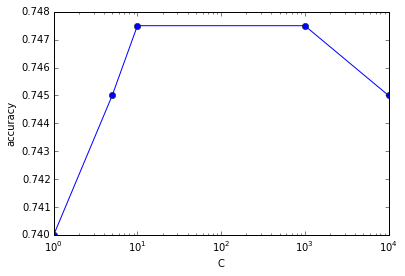

([0.73999999999999999,
  0.745,
  0.74749999999999994,
  0.74750000000000016,
  0.74500000000000011],
 [1.0, 1.0, 1.0, 1.0, 1.0])

In [159]:
def compare_c(filenames, y, penalty='l2', cs=[1, 5, 10, 1000, 10000]):
    accs = []
    train_accs = []
    # cs = [.00001, .1, 1, 5, 10, 1000]
    for c in cs:
        test_acc, train_acc = do_expt(filenames, y, c=c, penalty=penalty)
        accs.append(test_acc)
        train_accs.append(train_acc)
    plt.figure()
    plt.plot(cs, accs, 'bo-', label='test acc')
    # plt.plot(cs, train_accs, 'go-', label='train acc')
    plt.xlabel('C')
    plt.ylabel('accuracy')
    plt.xscale('log')
    plt.show()
    return accs, train_accs
    
compare_c(filenames, y)

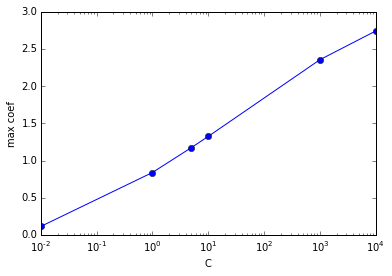

[0.11466026802541229,
 0.83929621603127313,
 1.1744811278974618,
 1.324203134850072,
 2.3546797109082895,
 2.7410768190860462]

In [160]:
def compare_c_coef(X, y, penalty='l2'):
    max_coef = []
    cs = [.01, 1, 5, 10, 1000, 10000]
    for c in cs:
        clf = get_clf(c=c, penalty=penalty)
        clf.fit(X, y)
        max_coef.append(max(np.abs(clf.coef_[0])))
    plt.figure()
    plt.plot(cs, max_coef, 'bo-')
    plt.xlabel('C')
    plt.ylabel('max coef')
    plt.xscale('log')
    plt.show()
    return max_coef
    
compare_c_coef(X, y)

## L1 Regularization

Penalize by absolute value of coefficients (rather than square):

$$
E(D, \theta) = - \prod_{i \in D} p(y_i|x_i) + \frac{1}{C}\sum_k |\theta_k|
$$


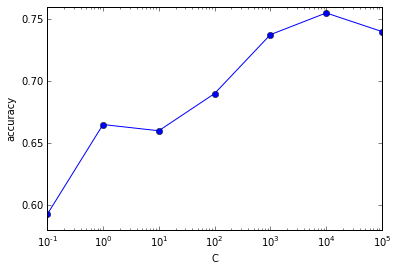

([0.59250000000000003,
  0.66500000000000004,
  0.65999999999999992,
  0.69000000000000006,
  0.73750000000000004,
  0.75500000000000012,
  0.73999999999999999],
 [0.68562500000000004, 0.99937500000000001, 1.0, 1.0, 1.0, 1.0, 1.0])

In [129]:
compare_c(filenames, y, penalty='l1', cs=[.1, 1., 10, 1e2, 1e3, 1e4, 1e5])

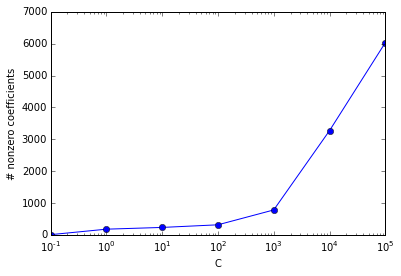

[9, 181, 236, 318, 784, 3271, 6031]

In [130]:
def compare_num_feats(X, y, cs=[.1, 1., 10, 1e2, 1e3, 1e4, 1e5]):
    nnzs = []
    for c in cs:
        clf = get_clf(c=c, penalty='l1')
        clf.fit(X, y)
        nnz = len(np.where(clf.coef_[0]!=0)[0])
        nnzs.append(nnz)
    plt.figure()
    plt.plot(cs, nnzs, 'bo-')
    plt.xlabel('C')
    plt.ylabel('# nonzero coefficients')
    plt.xscale('log')
    plt.show()
    return nnzs
    
compare_num_feats(X, y)

## Feature Selection

Chi-squared:

$$
\chi^2 = \sum_i \frac{(O_i - E_i)^2}{E_i}
$$

- $O_i$: observed count
- $E_i$: expected count
- $n$: number of instances


In [131]:
from sklearn.feature_selection import chi2

chi2(X,y)

(array([ 6.        ,  0.33333333,  1.28571429, ...,  1.        ,
         1.        ,  2.        ]),
 array([ 0.01430588,  0.56370286,  0.25683926, ...,  0.31731051,
         0.31731051,  0.15729921]))